In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (14, 6)

X_test = pd.read_csv('X_test.csv', index_col='date', parse_dates=True)
y_test = pd.read_csv('y_test.csv', index_col='date', parse_dates=True).squeeze()
model = joblib.load('best_model.pkl')

In [11]:
y_pred = model.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\n📊 Final Evaluation Metrics:")
print(f"  R²:   {r2:.4f}")
print(f"  MAE:  {mae:.2f}")
print(f"  MSE:  {mse:.2f}")
print(f"  MAPE: {mape:.2f}%")


📊 Final Evaluation Metrics:
  R²:   0.8454
  MAE:  1457.81
  MSE:  3547327.49
  MAPE: 1.40%


c:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


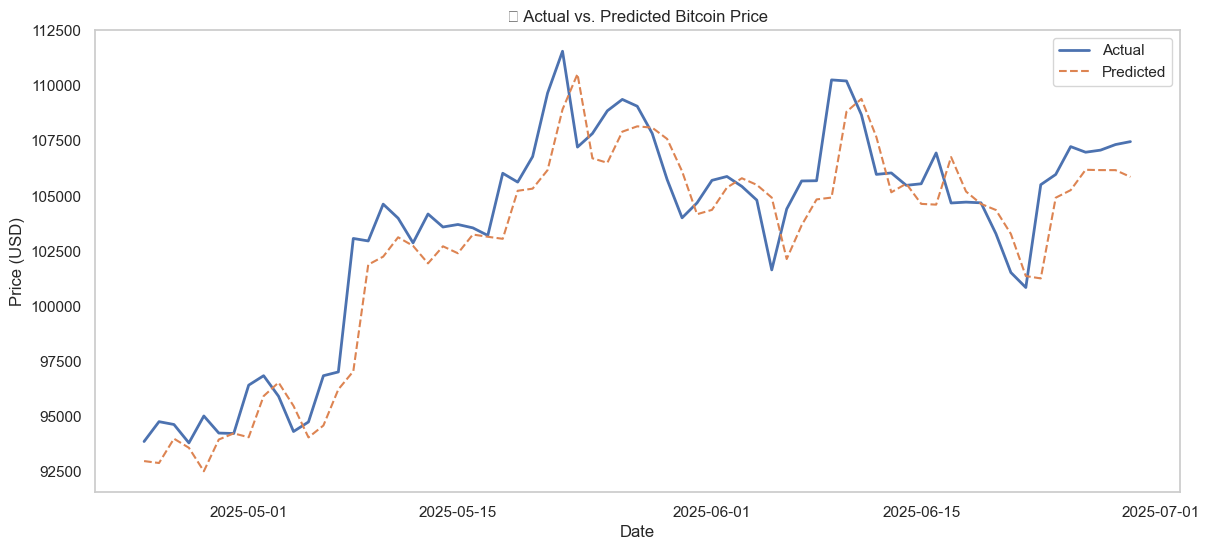

In [14]:
plt.plot(y_test.index, y_test.values, label='Actual', linewidth=2)
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
plt.title("📈 Actual vs. Predicted Bitcoin Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()

c:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


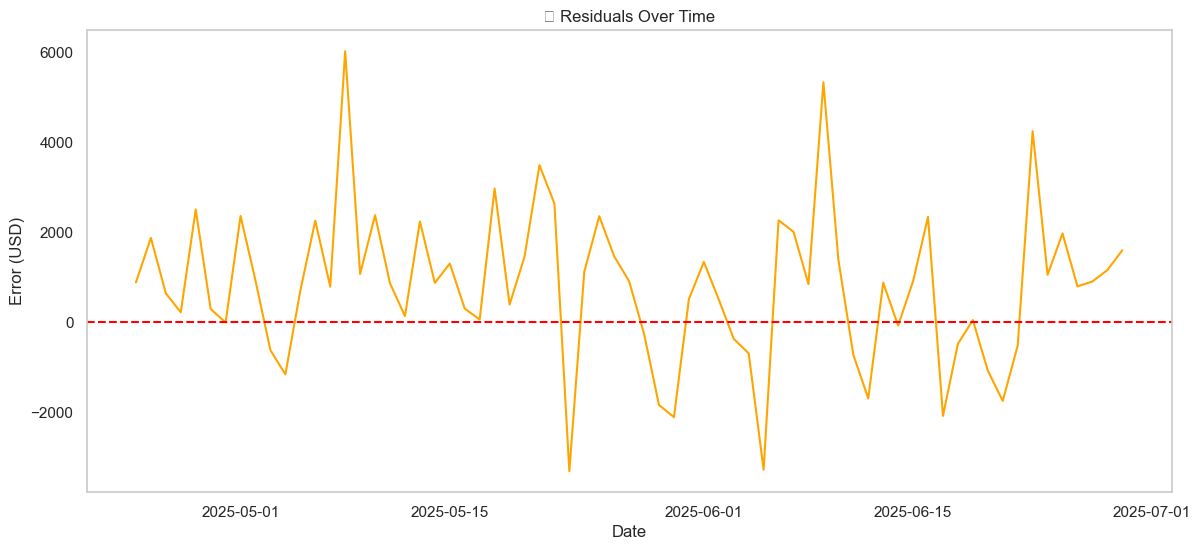

In [15]:
residuals = y_test - y_pred

plt.plot(y_test.index, residuals, label='Residuals', color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title("📉 Residuals Over Time")
plt.xlabel("Date")
plt.ylabel("Error (USD)")
plt.grid()
plt.show()

In [16]:
X_train = pd.read_csv('X_train.csv', index_col='date', parse_dates=True)
features = X_train.columns

if hasattr(model, 'coef_'):
    # Linear models
    importances = pd.Series(model.coef_, index=features)
    importances = importances.sort_values(key=abs, ascending=False)
    title = "Feature Importance (Ridge Coefficients)"
elif hasattr(model, 'feature_importances_'):
    # Tree models
    importances = pd.Series(model.feature_importances_, index=features)
    importances = importances.sort_values(ascending=False)
    title = "Feature Importance (Tree-Based Model)"
else:
    importances = None
    print("Feature importance not supported for this model type.")

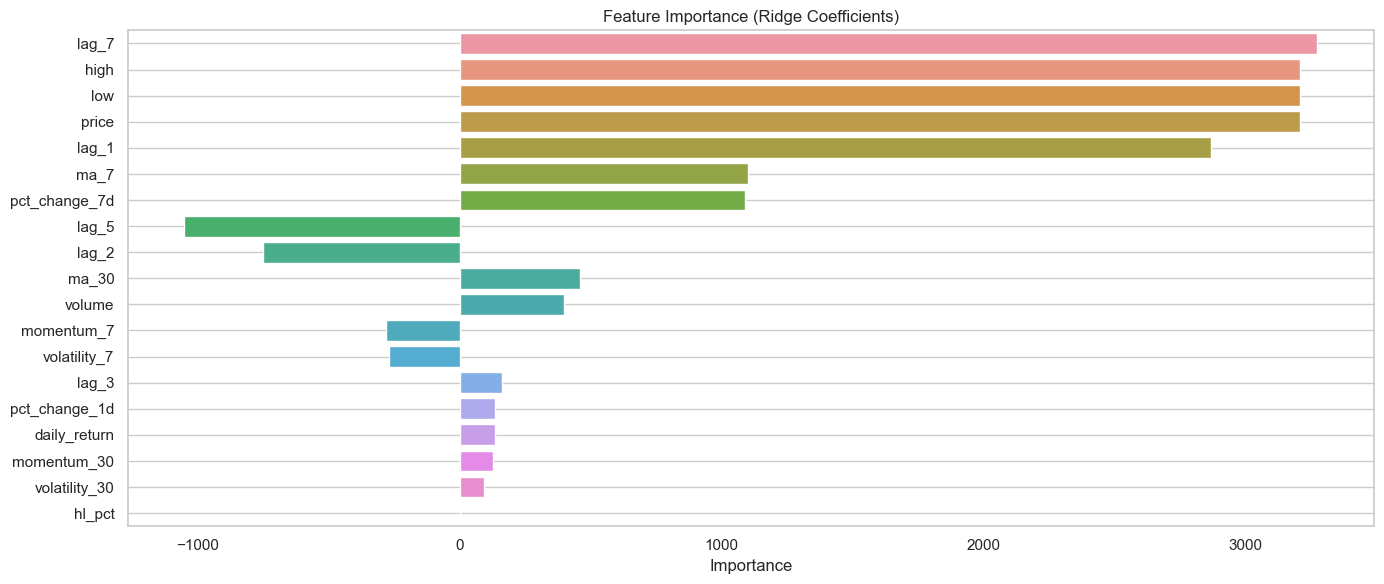

Feature importance saved to feature_importance.csv


In [18]:
if importances is not None:
    sns.barplot(x=importances.values, y=importances.index)
    plt.title(title)
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.grid()
    plt.show()

    # Save to CSV
    importances.to_csv('feature_importance.csv')
    print("Feature importance saved to feature_importance.csv")

In [20]:
pred_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'residual': residuals
}, index=y_test.index)

pred_df.to_csv('final_predictions.csv')
print("Final predictions saved to final_predictions.csv")

Final predictions saved to final_predictions.csv
